<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
# Write your code here
# Write your code here
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk


In [2]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd
df_tweets = pd.read_csv('tweets_sentiment.csv',encoding='ISO-8859-1')
df_tweets

,document_id,clean_text,sentiment
0,0,tayyayswift chartdata morganwallen attention g...,Positive
1,1,it sciencehigh9 podcast talk solutions mental ...,Negative
2,2,duaoiaa chartdata morganwallen attention go li...,Positive
3,3,podcast talk solutions mental health stroma bl...,Negative
4,4,doja4vogue chartdata morganwallen attention go...,Positive
...,...,...,...
995,995,it theleoterrell black lives matter got caught...,Negative
996,996,it tallycac today remember redeem render whose...,Neutral
997,997,it theleoterrell black lives matter got caught...,Negative
998,998,it theleoterrell black lives matter got caught...,Negative


In [6]:
tweets_text_df = df_tweets[['clean_text']]
tweets_text_df.head()

,clean_text
0,tayyayswift chartdata morganwallen attention g...
1,it sciencehigh9 podcast talk solutions mental ...
2,duaoiaa chartdata morganwallen attention go li...
3,podcast talk solutions mental health stroma bl...
4,doja4vogue chartdata morganwallen attention go...


In [52]:
from nltk.corpus import stopwords
from textblob import TextBlob
df_tweets['lower'] = df_tweets['clean_text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df_tweets['tokenization'] = df_tweets['lower'].apply(lambda x: tokenizer.tokenize(x))
df_tweets['stemming'] = df_tweets['tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])


In [18]:
txt = []
for line in df_tweets['stemming']:
  txt.append(line)

In [17]:
from gensim import corpora, models
bigram = models.Phrases(txt, min_count=5, threshold=100)
trigram = models.Phrases(bigram[txt], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
trigram_mod[bigram_mod[txt[0]]]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['tayyayswift',
 'chartdata',
 'morganwallen',
 'attent',
 'go',
 'lipaisbaddi',
 'account',
 'like',
 'all',
 'sweet',
 'get',
 '10000000',
 'million',
 'dollar',
 'freepromot',
 'dale',
 'blacklivesmatt',
 'lgbtqialivesmatt',
 'nopolitich',
 'note',
 'nose']

In [20]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
import spacy
data_words_bigrams = make_bigrams(txt)
nlp = spacy.load('en', disable=['parser', 'ner'])
tf_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
tf_lemmatized[:1]

[['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose']]

Corpus and Dictionary

In [39]:
id2word = corpora.Dictionary(tf_lemmatized)
texts = tf_lemmatized
data_corpus = [id2word.doc2bow(text) for text in texts]
data_corpus[:1]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]

In [40]:
id2word[0]

'account'

In [41]:
[[(id2word[id], freq) for id, freq in cp] for cp in data_corpus[:1]]

[[('account', 1),
  ('dollar', 1),
  ('freepromot', 1),
  ('go', 1),
  ('nose', 1),
  ('note', 1),
  ('sweet', 1)]]

LDA

In [42]:
lda_mdl = models.ldamodel.LdaModel(corpus=data_corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
from pprint import pprint
pprint(lda_mdl.print_topics())
doc_lda = lda_mdl[data_corpus]

[(0,
  '0.051*"bring" + 0.043*"begin" + 0.032*"world" + 0.031*"child" + '
  '0.029*"find" + 0.029*"must" + 0.026*"inmat" + 0.023*"mix" + 0.022*"univer" '
  '+ 0.021*"explor"'),
 (1,
  '0.143*"man" + 0.117*"year" + 0.116*"peopl" + 0.072*"life" + 0.068*"head" + '
  '0.065*"democrat_republ" + 0.049*"cut" + 0.040*"cop" + 0.027*"conflict_upon" '
  '+ 0.027*"centuri_give"'),
 (2,
  '0.038*"church" + 0.031*"could" + 0.031*"demand" + 0.030*"special" + '
  '0.029*"resist" + 0.021*"seek" + 0.020*"folk" + 0.019*"feel" + '
  '0.019*"corrupt" + 0.018*"mean"'),
 (3,
  '0.113*"free" + 0.069*"podcast" + 0.049*"health" + 0.045*"show" + '
  '0.039*"take" + 0.027*"davi" + 0.026*"sanction" + '
  '0.021*"fairblacklivesmatt_implicitbia" + 0.021*"dew" + 0.020*"icon"'),
 (4,
  '0.091*"woman" + 0.082*"word" + 0.048*"fight" + 0.039*"account" + '
  '0.036*"mavulandlela" + 0.033*"hold" + 0.031*"scandal" + 0.029*"appl" + '
  '0.028*"car" + 0.027*"applepodcast"'),
 (5,
  '0.106*"help" + 0.056*"face" + 0.053*"live" 

In [44]:
from gensim.models import CoherenceModel
print('Perplexity: ', lda_mdl.log_perplexity(data_corpus))
coh_model_lda = CoherenceModel(model=lda_mdl, texts=tf_lemmatized, dictionary=id2word, coherence='c_v')
coh_lda = coh_model_lda.get_coherence()
print('Coherence: ', coh_lda)

Perplexity:  -5.7663605243998655
Coherence:  0.48314048708231716


In [48]:
tf_lemmatized

[['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose'],
 ['sciencehigh9',
  'podcast',
  'talk',
  'solut',
  'mental',
  'health',
  'black',
  'tune',
  'httpstco8fg57'],
 ['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose'],
 ['podcast',
  'talk',
  'solut',
  'mental',
  'health',
  'tune',
  'podernfamili',
  'podcast'],
 ['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose'],
 ['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose'],
 ['go', 'account', 'sweet', 'dollar', 'freepromot', 'note', 'nose'],
 ['sixti_my', 'use', 'amp', 'talk', 'inhuman'],
 ['blackwomen', 'check', 'item', 'open', 'open'],
 ['right', 'play', 'sell', 'judeochristian', 'equal', 'come', 'life'],
 ['come', 'breakthesil', 'more', 'rejects319'],
 ['black',
  'live',
  'matter',
  'get',
  'catch',
  'buy',
  'claim',
  'racism',
  'blacklivesmatt',
  'racism',
  'organ'],
 ['dress_cop', 'justicefor'],
 ['sexual',
  'girl',
  'face',
  'live',
  'condit',
  'face'

LSA

In [45]:
lsamodel = models.LsiModel(data_corpus, num_topics = 20, id2word = id2word)

In [46]:
lsamodel.print_topics(num_topics = 20)

[(0,
  '0.540*"racism" + 0.339*"blacklivesmatt" + 0.300*"black" + 0.275*"get" + 0.274*"live" + 0.270*"matter" + 0.263*"buy" + 0.262*"catch" + 0.262*"organ" + 0.262*"claim"'),
 (1,
  '0.511*"blacklivesmatt" + 0.370*"go" + 0.368*"can" + 0.347*"pot" + 0.340*"anti" + 0.230*"nose" + 0.223*"veedusm" + -0.142*"racism" + 0.111*"talk" + 0.109*"record"'),
 (2,
  '0.392*"talk" + 0.380*"stop" + 0.366*"nut" + 0.366*"trash" + 0.365*"record" + 0.267*"blacklivesmatt" + -0.217*"can" + -0.216*"go" + -0.205*"pot" + -0.197*"anti"'),
 (3,
  '0.661*"black" + 0.391*"man" + 0.252*"year" + 0.216*"peopl" + 0.171*"head" + 0.169*"democrat_republ" + -0.161*"racism" + 0.132*"sanction" + 0.109*"support" + -0.102*"get"'),
 (4,
  '0.781*"sanction" + 0.347*"breakthesil" + -0.200*"year" + -0.196*"man" + 0.180*"call" + 0.166*"peopl" + 0.148*"illeg" + 0.138*"economi" + -0.135*"head" + -0.134*"democrat_republ"'),
 (5,
  '0.511*"year" + -0.446*"black" + 0.330*"man" + 0.324*"head" + 0.321*"democrat_republ" + 0.258*"sanction"

In [56]:
from gensim import corpora, models
coh_values = []
model_list = []
for num_topics in range(12):
  model_temp = models.LsiModel(data_corpus, num_topics = 20, id2word = id2word)
  model_list.append(model_temp)
  #print(model_list)
  coh_model = CoherenceModel(model= model_temp, texts = tf_lemmatized, dictionary = id2word, coherence='c_v')
  coh_values.append(coh_model.get_coherence())
coh_values

[0.41614878003631645,
 0.4399823160154453,
 0.45460108453461395,
 0.44888837446765556,
 0.443997099762315,
 0.47211354002655365,
 0.46919366339961294,
 0.43249549230255474,
 0.451703370093988,
 0.4674705835947317,
 0.4757531232196729,
 0.4588478308983433]

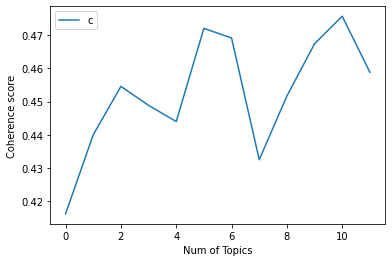

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
x = range(12)
plt.plot(x, coh_values)
plt.xlabel("Num of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

**Top 10 clusters**

In [61]:
!pip install biterm
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

bi_term = df_tweets['clean_text'].head(100).values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(bi_term).toarray()

text = np.array(vector.get_feature_names())
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)

topic_summuary(model.phi_wz.T, X_tfidf, text, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

Topic 0 | Coherence=-23.99 | Top words= blacklivesmatter ulm donation nycpd sun charge city citynew crowd defundthepolice
Topic 1 | Coherence=-17.65 | Top words= sanction hellohe59251817 impose ineffective tools blunt costs governments policy insufficient
Topic 2 | Coherence=-9.41 | Top words= heard blacklivesmatter bee instagram papa friend cop photo amber dressed
Topic 3 | Coherence=-4.09 | Top words= sanction ethiopia global creating financial hindrance cuts proposed hr6600 ethiopian
Topic 4 | Coherence=-5.10 | Top words= 10 donation support target hit thanks continue don raising ply
Topic 5 | Coherence=-12.01 | Top words= smallstreamer hum twitch twitchaffiliate twitchstreamers need streamers sick notes supportsmallst
Topic 6 | Coherence=-10.95 | Top words= blacklivesmatter nose morganwallen sweets dollars freepromotion note attention account nopolitich
Topic 7 | Coherence=1.72 | Top words= revolutionblackedout acceptable reportpemra ironlady rterdogan mbsofksa judicial dgispr sile

{'coherence': [-23.9928934991343,
  -17.647817685161904,
  -9.409162583685239,
  -4.089361312338631,
  -5.104278170365558,
  -12.012635987721142,
  -10.949615296915445,
  1.7170283259973285,
  -32.44840975838798,
  -41.53075538466961],
 'top_words': [array(['blacklivesmatter', 'ulm', 'donation', 'nycpd', 'sun', 'charge',
         'city', 'citynew', 'crowd', 'defundthepolice'], dtype='<U25'),
  array(['sanction', 'hellohe59251817', 'impose', 'ineffective', 'tools',
         'blunt', 'costs', 'governments', 'policy', 'insufficient'],
        dtype='<U25'),
  array(['heard', 'blacklivesmatter', 'bee', 'instagram', 'papa', 'friend',
         'cop', 'photo', 'amber', 'dressed'], dtype='<U25'),
  array(['sanction', 'ethiopia', 'global', 'creating', 'financial',
         'hindrance', 'cuts', 'proposed', 'hr6600', 'ethiopian'],
        dtype='<U25'),
  array(['10', 'donation', 'support', 'target', 'hit', 'thanks', 'continue',
         'don', 'raising', 'ply'], dtype='<U25'),
  array(['smallstr

In [ ]:
#Summarize the topic for each cluster
1. Defund the police, stop donations to NYCPD
2. Governament policies are insuffiecient, impose sanctions 
3. Instagram photo on amber dressed friend
4. Sanctions on ethiopia creates global financial hinderance.
5. Continue to support and raising the donations.
6. Twitch streamers need to support smallest.
7. Morgan Wallen donated dollors, get attention and promotion.
8. Silence is not acceptable, report PEMRA
9. Break the silence on racism and black lives
10.Attrocities on woman are inhuman 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [64]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()
x_tf_vect = tf_vect.fit_transform(df_tweets['clean_text'])
x_tf_vect.shape

(1000, 2848)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mul_nb = MultinomialNB()
l_svc = LinearSVC()

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_tf_vect, df_tweets['sentiment'], test_size=0.2, random_state=20)
mnb_model = mul_nb.fit(x_train,y_train)

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred_mnb = mnb_model.predict(x_test)
print('MultinomialNB Model:')
print(f'Accuracy: ${accuracy_score(y_pred_mnb,y_test)}')
print(f'Classification report:')
print(classification_report(y_test,y_pred_mnb))

MultinomialNB Model:
Accuracy: $0.905
Classification report:
              precision    recall  f1-score   support

    Negative       0.87      0.97      0.91        60
     Neutral       0.91      0.94      0.93        80
    Positive       0.94      0.80      0.86        60

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [71]:
from sklearn.model_selection import cross_val_score

corss_val_score = cross_val_score(mnb_model, x_test, y_test, cv=7)
print("MNB Mean",corss_val_score.mean())

MNB Mean 0.7707600281491908


**SVM Model**

In [72]:
svm_model = l_svc.fit(x_train,y_train)
y_svm_pred = svm_model.predict(x_test)
print('SVM Model:')
print(f'Accuracy: ${accuracy_score(y_svm_pred, y_test)}')
print(classification_report(y_test, y_svm_pred))

SVM Model:
Accuracy: $0.915
              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93        60
     Neutral       0.92      0.91      0.92        80
    Positive       0.87      0.92      0.89        60

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [73]:
scores = cross_val_score(svm_model, x_test, y_test, cv=7)
print(f'SVM Mean: ${scores.mean()}')

SVM Mean: $0.8304011259676284


I have used SVM and multinomial Naivee Bayes algorithms to build sentiment classifiers.

I performed Term Frequency Inverse Document Frequency (TF-IDF) to deal with the most frequent words. 

TF-IDF gives a way to associate each word in the document with a number that represents how relevant each word is in that document. Then the documents with similar, relevant words will have similar vectors.

Below are the results for SVM and MNB algorithms

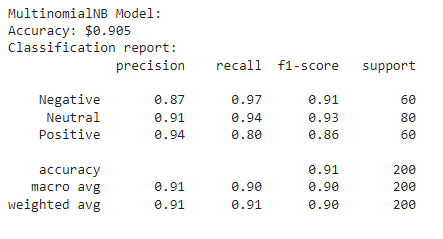


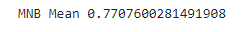

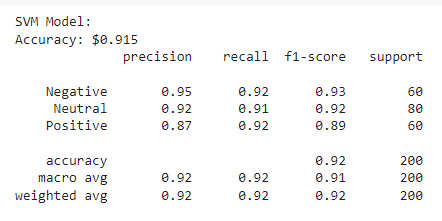

image.png

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [74]:
# Write your code here

!pip install --user numpy
!pip install --user  pandas


In [91]:
# Write your code here
import pandas as pd
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [79]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [83]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

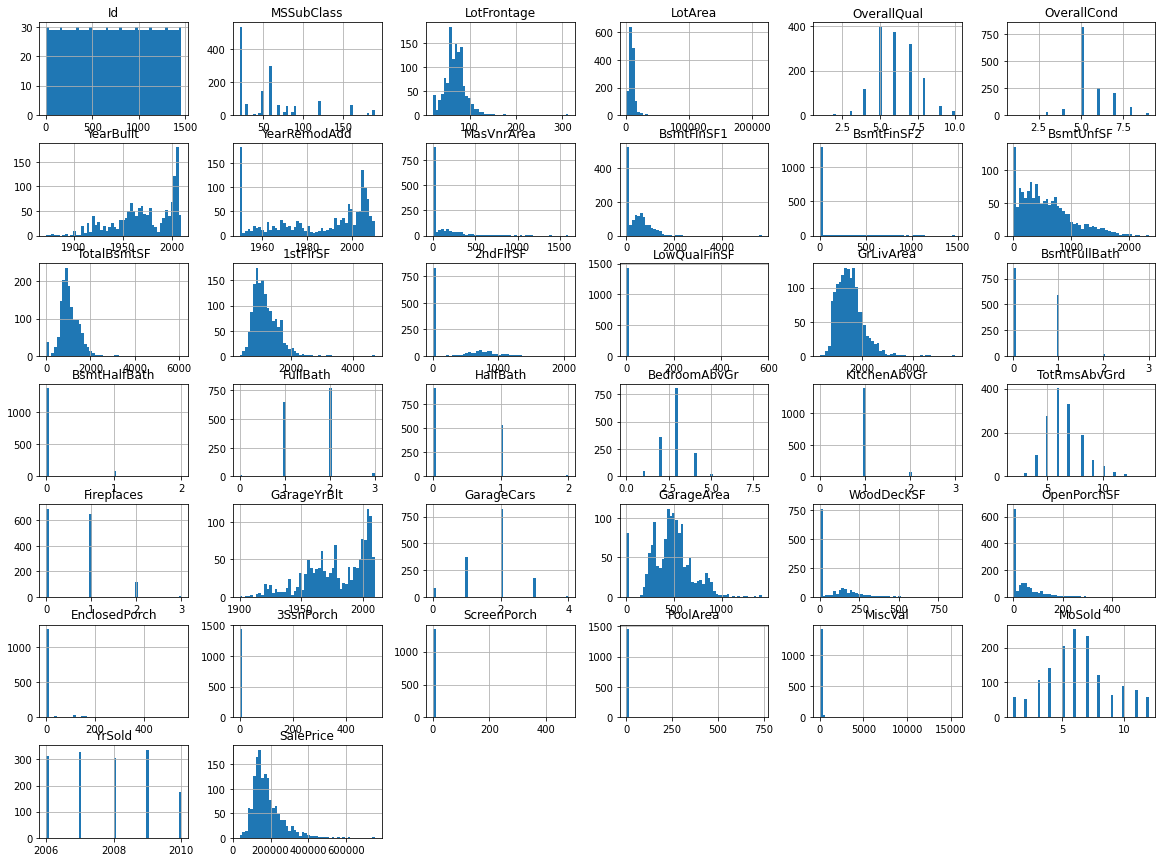

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [93]:
cor_matrix = train_df.corr()
cor_matrix["YrSold"].sort_values(ascending=False)
cor_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

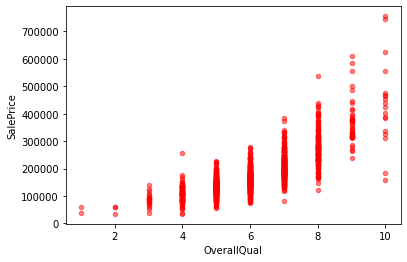

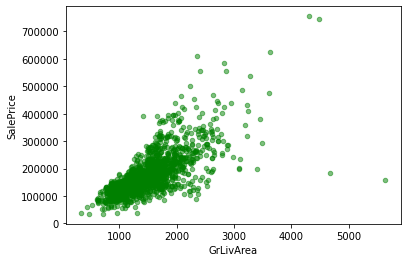

In [100]:
train_df.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5, color="r")
train_df.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5, color="g")

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

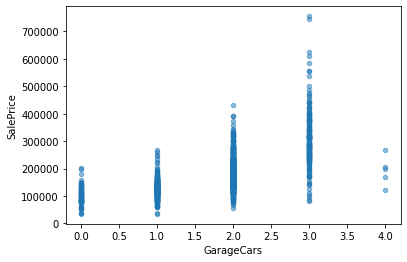

In [101]:
train_df.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:>

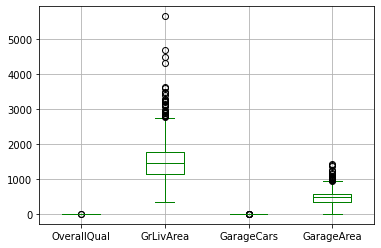

In [104]:
train_df.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], color="g")

<AxesSubplot:>

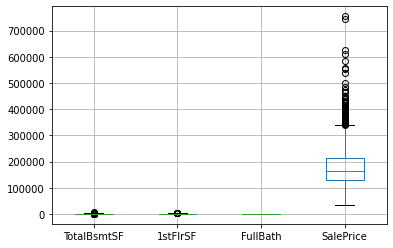

In [105]:
train_df.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [106]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [108]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [109]:
import numpy as np
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [110]:
train_df.fillna(999, inplace=True)

Model Training

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

columns = ['GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig']

for c in columns:
    encoder_train = LabelEncoder()
    encoder_test = LabelEncoder()
    encoder_train.fit(list(train_df[c].values))
    encoder_test.fit(list(test_df[c].values))
    train_df[c] = encoder_train.transform(list(train_df[c].values))
    test_df[c] = encoder_test.transform(list(test_df[c].values))

x_train = train_df[train_df.columns[:80]]
y_train = train_df['YrSold']
x_test = test_df[test_df.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [112]:
import numpy as np
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(999, inplace=True)

Predictions

In [113]:
predicted = regressor.predict(x_train)

In [116]:
pd.DataFrame({'Predicted_Prices': predicted})

,Predicted_Prices
0,2.000000e+00
1,1.000000e+00
2,2.000000e+00
3,-1.753184e-13
4,2.000000e+00
...,...
1455,1.000000e+00
1456,4.000000e+00
1457,4.000000e+00
1458,4.000000e+00
